# Credit Risk Evaluator

In [35]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [6]:
# Import the data
df = pd.read_csv(os.path.join("Resources", "lending_data.csv"))
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*In my view, the logistic regression model should beat the random forest model. On the other hand, the random forest model breaks the data down into smaller pieces, and the combined results of these pieces might have more variability than the logistic regression model. I think both models will do great.*

## Split the Data into Training and Testing Sets

In [8]:
# Create X (features) and y (target) sets 
X = df.drop(["loan_status"], axis=1)
y = df["loan_status"].values

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
63249,9600.0,7.202,48400,0.380165,4,0,18400
30656,8300.0,6.659,43300,0.307159,2,0,13300
49270,10800.0,7.699,53000,0.433962,5,1,23000
30751,9300.0,7.063,47100,0.363057,3,0,17100
52333,9300.0,7.097,47400,0.367089,3,0,17400


In [11]:
print("X_y_train_Shape: ", X_train.shape, y_train.shape)
print("X_y_test_Shape: ", X_test.shape, y_test.shape)

X_y_train_Shape:  (58152, 7) (58152,)
X_y_test_Shape:  (19384, 7) (19384,)


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. You may choose any starting hyperparameters you like.

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [14]:
# Create a logistic regresion model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)

In [15]:
# Train the logistic regression model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [16]:
# Print the training and testing scores
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9919521254643004
Testing Data Score: 0.9921584812216261


In [21]:
# Train a Random Forest Classifier model and print the model score
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9973861604072087
Testing Score: 0.991384647131655


In [24]:
feature_importances = clf.feature_importances_

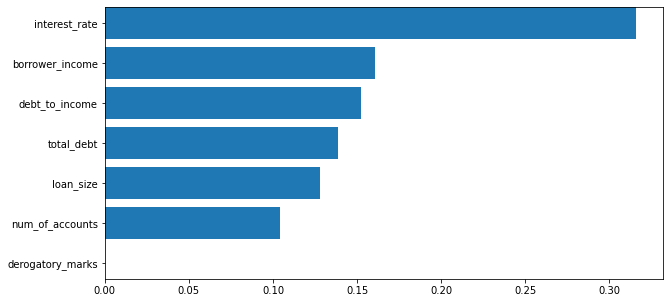

In [34]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [36]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [37]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [38]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9676537350392076
Testing Score: 0.9680664465538589


In [39]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


### Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.

*Both models did amazing at sorting the data. The Logistic Regression Model was a little better at doing it accurately compared to the Random Forest Classifier. The difference wasn't that big though.*
